**This module is not intended as advice to trade, it is for use in your trading analyses and algorithms. Use at your own risk.**

This screener uses Donchian Channels, Average True Range, and other inputs to determine if a stock, future or other financial instrument with timeseries (OHLC) may breakout out of its defined channel.

Required data:
- Pandas dataframe containing index as datetime and columns (High, Low, Open, Close) as float
- Define the number of breakout periods (default: 55 periods)
- Average True Range (ATR) window (default: 14 periods)
- ATR multiple (default: 1.5)- sensitivy used to determine a level at which the alert will provide a positive signal

The response returned is a tuple of the signal and a plotly chart: (signal, chart)
create_chart=False is default. The signal is one of three options: 1, -1, 0
*   1 - Possbile breakout to go long
* -1 - Possible breakuot to go short
*   0 - Too far from either price channel

Dependencies:
- pandas
- ta
- plotly

**Import required modules**

pandas_datareader only used as example. You can generate your timeseries data from whichever source you choose.

In [8]:
import trendalert
import pandas as pd
import pandas_datareader as pdr
# import plotly.io as pio
import plotly.offline as py
import plotly

# create screen object
tas = trendalert.breakout_screen()

**Get timeseries**

In [2]:
tickers = ['AAPL', 'NFLX']
start_date = '2020-01-01'
end_date = '2021-12-31'

panel_data = pdr.DataReader(tickers, 'yahoo', start_date, end_date)
df = panel_data.stack().reset_index()
df['Date'] = pd.to_datetime(df['Date'])
df['Close'] = df['Close'] * df['Adj Close'] / df['Close']
df['Open'] = df['Open'] * df['Adj Close'] / df['Close']
df['High'] = df['High'] * df['Adj Close'] / df['Close']
df['Low'] = df['Low'] * df['Adj Close'] / df['Close']
df = df.set_index('Date')
symbol = 'NFLX'
df1 = df[df['Symbols']==symbol] 
df1 # will pass df1 to screener function later

Attributes,Symbols,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2020-01-02,NFLX,329.809998,329.809998,329.980011,324.779999,326.100006,4485800.0
2020-01-03,NFLX,325.899994,325.899994,329.859985,325.529999,326.779999,3806900.0
2020-01-06,NFLX,335.829987,335.829987,336.359985,321.200012,323.119995,5663100.0
2020-01-07,NFLX,330.750000,330.750000,336.700012,330.299988,336.470001,4703200.0
2020-01-08,NFLX,339.260010,339.260010,342.700012,331.049988,331.489990,7104500.0
...,...,...,...,...,...,...,...
2021-01-12,NFLX,494.250000,494.250000,501.089996,485.670013,500.000000,5990400.0
2021-01-13,NFLX,507.790009,507.790009,512.349976,493.010010,495.500000,5032100.0
2021-01-14,NFLX,500.859985,500.859985,514.500000,499.579987,507.350006,4177400.0


**Example with default settings**

Note the returned tuple for NFLX is (0, None) - signal is neutral in that NFLX isn't close to breaking out based on screener criteria

In [3]:
tas.breaking_out(df1, symbol, atr_window=14, breakout_periods=55, atrmultiple_test=1.5, create_chart=False)

(0, None)

**Example with create_chart=True**

Note the returned tuple for NFLX is (0, None) - signal is neutral in that NFLX isn't close to breaking out based on screener criteria. The second value in the tuple is the plotly figure that we'll use in the next example

In [4]:
tas.breaking_out(df1, symbol, atr_window=14, breakout_periods=55, atrmultiple_test=1.5, create_chart=True)

(0,
 Figure({
     'data': [{'close': array([329.80999756, 325.8999939 , 335.82998657, ..., 500.85998535,
                               497.98001099, 505.29998779]),
               'high': array([329.98001099, 329.85998535, 336.35998535, ..., 514.5       ,
                              506.32000732, 509.25      ]),
               'low': array([324.77999878, 325.52999878, 321.20001221, ..., 499.57998657,
                             495.1000061 , 493.54269409]),
               'name': 'NFLX',
               'open': array([326.1000061 , 326.77999878, 323.11999512, ..., 507.3500061 ,
                              500.        , 501.        ]),
               'type': 'candlestick',
               'x': array([datetime.datetime(2020, 1, 2, 0, 0),
                           datetime.datetime(2020, 1, 3, 0, 0),
                           datetime.datetime(2020, 1, 6, 0, 0), ...,
                           datetime.datetime(2021, 1, 14, 0, 0),
                           datetime.datetime(2021, 

Signal:  0


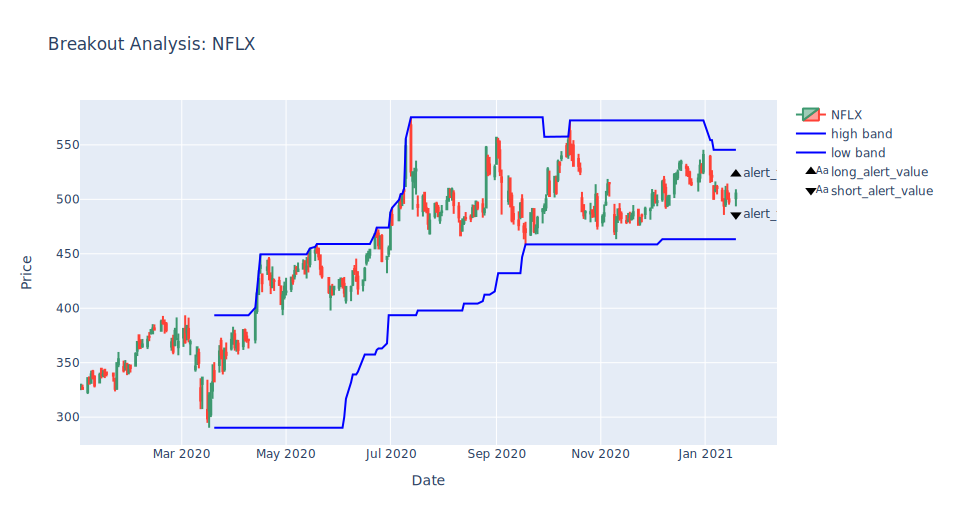

In [24]:
signal, fig = tas.breaking_out(df1, symbol, atr_window=14, breakout_periods=55, atrmultiple_test=1.5, create_chart=True)
print('Signal: ', signal)
# py.iplot(fig) # usually fig.show() but needed py.iplot() for rendering markdown
# fig.show(renderer="notebook_connected")
# pio.show(fig)
# py.iplot(fig)
fig.show(renderer="svg", width=954, height=525) # needs orca installed
# fig.show()

**Example with create_chart=True**

Modify the breakout days to 20 and analyze timeseries. Note that on 20 days, the signal is -1; nearing the lower donchian channel.

Signal:  -1


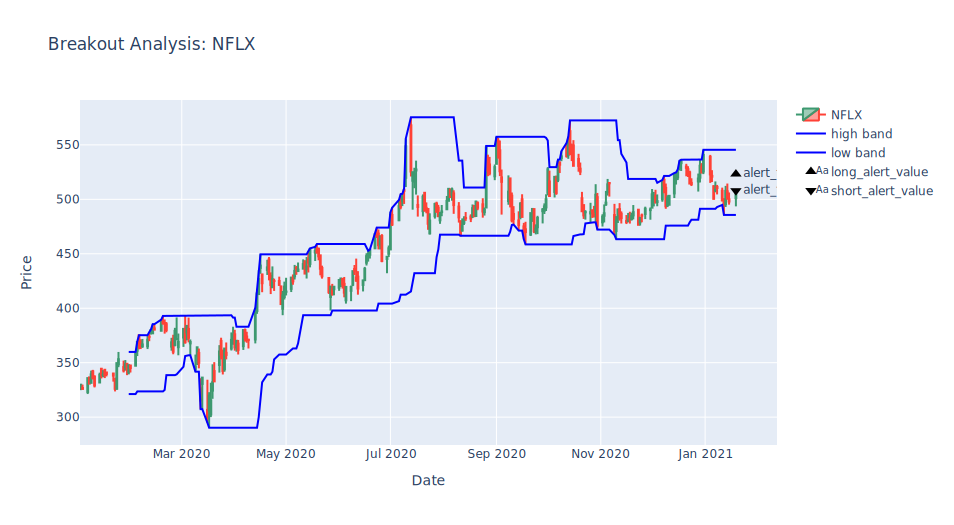

In [23]:
signal, fig = tas.breaking_out(df1, symbol, atr_window=14, breakout_periods=20, atrmultiple_test=1.5, create_chart=True)
print('Signal: ', signal)
# py.iplot(fig) # usually fig.show() but needed py.iplot() for rendering markdown
# fig.show(renderer="notebook_connected")
fig.show(renderer="svg", width=954, height=525) # needs orca installed
# pio.show(fig)
# fig.show()

In [17]:
plotly.io.orca.config.executable = 'C:\\Users\\jleon\\AppData\\Local\\Programs\\orca\\orca.exe'
plotly.io.orca.config.save()

**Additional Methods**

The screener returns several values to use in addition to the signal and chart.

In [ ]:
tas.atr
tas.atr_multiple_high
tas.atr_multiple_low
tas.delta_from_high
tas.delta_from_low
tas.don_hband
tas.don_lband
tas.last_atr
tas.last_close
tas.last_don_hband
tas.last_don_lband
tas.last_high
tas.last_low
tas.last_open
tas.last_tradingDay